In [1]:
import requests
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
API_KEY = '7ecdf2c0aa57cf1965f353edf1399905cc464a2c'
BASE_URL_TEMPLATE = 'https://api.census.gov/data/{year}/acs/acs5'

# list of columns to fetch from data using the API

variables = [
    'NAME',
    'B01001_001E',  # Total population
    'B01002_001E',  # Median age
    'B19013_001E',  # Median household income
    'B01001_003E',  # Under 5 years
    'B01001_004E',  # 5 to 9 years
    'B01001_005E',  # 10 to 14 years
    'B01001_006E',  # 15 to 17 years
    'B01001_007E',  # 18 and 19 years
    'B01001_008E',  # 20 years
    'B01001_009E',  # 21 years
    'B01001_010E',  # 22 to 24 years
    'B01001_011E',  # 25 to 29 years
    'B01001_012E',  # 30 to 34 years
    'B01001_013E',  # 35 to 39 years
    'B01001_014E',  # 40 to 44 years
    'B01001_015E',  # 45 to 49 years
    'B01001_016E',  # 50 to 54 years
    'B01001_017E',  # 55 to 59 years
    'B01001_018E',  # 60 and 61 years
    'B01001_019E',  # 62 to 64 years
    'B01001_020E',  # 65 and 66 years
    'B01001_021E',  # 67 to 69 years
    'B01001_022E',  # 70 to 74 years
    'B01001_023E',  # 75 to 79 years
    'B01001_024E',  # 80 to 84 years
    'B01001_025E',  # 85 years and over
]

# Convert list to string for use in API
variables_str = ','.join(variables)

column_names = [
                'Name', 'Total population', 'Median age', 'Median household income($)', 'Under 5 years', 
                '5 to 9 years', '10 to 14 years', '15 to 17 years', '18 and 19 years', '20 years', 
                '21 years', '22 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', 
                '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 and 61 years', 
                '62 to 64 years', '65 and 66 years', '67 to 69 years', '70 to 74 years', '75 to 79 years', 
                '80 to 84 years', '85 years and over', 'zip code tabulation area'
            ]

def fetch_census_data(year):
    base_url = BASE_URL_TEMPLATE.format(year=year)
    # Define the parameters for the API request
    params = {
        'get': variables_str,
        'for': 'zip code tabulation area:*',
        'key': API_KEY
    }
    # Make the API request
    response = requests.get(base_url, params=params)

    # Check the response status
    if response.status_code == 200:
        try:
            data = response.json()
            # Convert to DataFrame
            columns = column_names
            rows = data[1:]
            df = pd.DataFrame(rows, columns=columns)
            return df
        except ValueError as e:
            print(f"Error decoding JSON for year {year}. Response content:")
            print(response.text)
            print(f"JSONDecodeError: {e}")
    else:
        print(f"Failed to fetch data for year {year}: {response.status_code}")
        print("Response content:")
        print(response.text)
    return None

# List of years to fetch data for
years = [2018, 2019, 2020, 2021, 2022]

# Fetch data for each year and concatenate into a single DataFrame
all_data = []
for year in years:
    print(f"Fetching data for year {year}...")
    df = fetch_census_data(year)
    if df is not None:
        df['Year'] = year
        all_data.append(df)

# Combine all data into a single DataFrame
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    # Save the DataFrame to a CSV file
    csv_file_path = 'census_data_combined.csv'
    combined_df.to_csv(csv_file_path, index=False)
    print(f"Data saved to {csv_file_path}")
else:
    print("No data fetched.")


Fetching data for year 2018...


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Fetching data for year 2021...
Fetching data for year 2022...
Data saved to census_data_combined.csv


In [3]:
df = pd.read_csv('census_data.csv')

In [4]:
df.describe()

Total population    White alone  Black or African American alone  \
count      33774.000000   33774.000000                     33774.000000   
mean        9900.097027    6500.458430                      1230.967490   
std        14908.088606    9265.878654                      3829.393787   
min            0.000000       0.000000                         0.000000   
25%          649.250000     521.000000                         0.000000   
50%         2656.000000    2120.000000                        29.000000   
75%        13329.000000    8846.000000                       610.750000   
max       134008.000000  118381.000000                     81608.000000   

       American Indian and Alaska Native alone   Asian alone  \
count                             33774.000000  33774.000000   
mean                                 82.635518    566.091787   
std                                 344.469263   2202.392989   
min                                   0.000000      0.000000   
25%                                   0.000000      0.000000   
50%                                   2.000000      8.000000   
75%                                  41.000000    178.000000   
max                               15363.000000  57749.000000   

       Native Hawaiian and Other Pacific Islander alone  \
count                                      33774.000000   
mean                                          18.509267   
std                                          193.561526   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                        22948.000000   

       Some other race alone  Two or more races    Median age  \
count           33774.000000       33774.000000  3.377400e+04   
mean              615.994522         885.440013 -1.817962e+07   
std              2279.968699        2053.069866  1.085800e+08   
min                 0.000000           0.000000 -6.666667e+08   
25%                 0.000000          15.000000  3.670000e+01   
50%                19.000000         109.000000  4.170000e+01   
75%               257.000000         775.000000  4.790000e+01   
max             59399.000000       38031.000000  9.300000e+01   

       Median household income($)  Male population  Female population  \
count                3.377400e+04     33774.000000       33774.000000   
mean                -6.217092e+07      4907.600195        4992.496832   
std                  1.939778e+08      7354.782499        7573.055977   
min                 -6.666667e+08         0.000000           0.000000   
25%                  4.846650e+04       330.000000         311.000000   
50%                  6.388650e+04      1344.000000        1303.000000   
75%                  8.277750e+04      6634.000000        6683.500000   
max                  2.500010e+05     66792.000000       67216.000000   

       Total educational attainment  High school graduate  Bachelors degree  \
count                  33774.000000          33774.000000      33774.000000   
mean                    6780.328537           1522.932848        594.745958   
std                    10094.140072           2236.593224        902.511252   
min                        0.000000              0.000000          0.000000   
25%                      443.000000            133.000000         38.000000   
50%                     1844.500000            528.000000        175.000000   
75%                     9154.250000           1998.000000        778.750000   
max                    80997.000000          30944.000000       8704.000000   

       Masters degree  zip code tabulation area  
count    33774.000000              33774.000000  
mean       646.283384              49697.743856  
std       1253.234169              27546.331750  
min          0.000000                601.000000  
25%         16.0

In [5]:
df[df['Median household income($)'] == -666666666.0]

Name  Total population  White alone  \
14     ZCTA5 00636              1057          603   
44     ZCTA5 00694                98            0   
88     ZCTA5 00786               154           66   
93     ZCTA5 00906               148          148   
109    ZCTA5 00934               128           69   
...            ...               ...          ...   
33751  ZCTA5 99825                16           16   
33762  ZCTA5 99850                 0            0   
33764  ZCTA5 99903                 1            1   
33769  ZCTA5 99923                25           25   
33772  ZCTA5 99927                14           14   

       Black or African American alone  \
14                                   0   
44                                   0   
88                                  67   
93                                   0   
109                                 59   
...                                ...   
33751                                0   
33762                                0   
33764                                0   
33769                                0   
33772                                0   

       American Indian and Alaska Native alone  Asian alone  \
14                                           0            0   
44                                           0            0   
88                                           0            0   
93                                           0            0   
109                                          0            0   
...                                        ...          ...   
33751                                        0            0   
33762                                        0            0   
33764                                        0            0   
33769                                        0            0   
33772                                        0            0   

       Native Hawaiian and Other Pacific Islander alone  \
14                                                    0   
44                                                    0   
88                                                    0   
93                                                    0   
109                                                   0   
...                                                 ...   
33751                                                 0   
33762                                                 0   
33764                                                 0   
33769                                                 0   
33772                                                 0   

       Some other race alone  Two or more races   Median age  \
14                       385                 69         29.7   
44                        25                 73         73.7   
88                         0                 21         61.3   
93                         0                  0         35.2   
109                        0                  0         32.3   
...                      ...                ...          ...   
33751                      0                  0         73.4   
33762                      0                  0 -666666666.0   
33764                      0                  0 -666666666.0   
33769                      0                  0 -666666666.0   
33772                      0                  0 -666666666.0   

       Median household income($)  Male population  Female population  \
14                     -666666666              576                481   
44                     -666666666               52                 46   
88                     -666666666               72                 82   
93                     -666666666               80                 68   
109                    -666666666               84                 44   
...                           ...              ...                ...   
33751                  -666666666                7                  9   
33762                  -666666666                0   

In [6]:
df.replace(-666666666.0, pd.NA, inplace=True)

In [7]:
df['Median age'].isnull().sum()

921

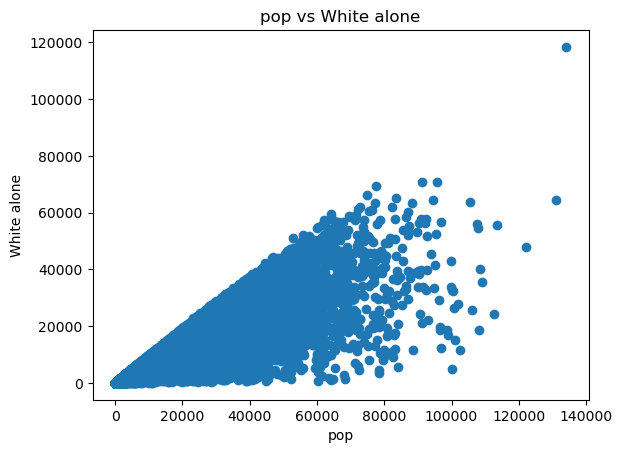

In [8]:
plt.scatter(df['Total population'], df['White alone'])
plt.title('pop vs White alone')
plt.xlabel('pop')
plt.ylabel('White alone')
plt.show()

In [12]:
df.dropna(inplace=True)

In [9]:
df.describe()

Total population    White alone  Black or African American alone  \
count      33774.000000   33774.000000                     33774.000000   
mean        9900.097027    6500.458430                      1230.967490   
std        14908.088606    9265.878654                      3829.393787   
min            0.000000       0.000000                         0.000000   
25%          649.250000     521.000000                         0.000000   
50%         2656.000000    2120.000000                        29.000000   
75%        13329.000000    8846.000000                       610.750000   
max       134008.000000  118381.000000                     81608.000000   

       American Indian and Alaska Native alone   Asian alone  \
count                             33774.000000  33774.000000   
mean                                 82.635518    566.091787   
std                                 344.469263   2202.392989   
min                                   0.000000      0.000000   
25%                                   0.000000      0.000000   
50%                                   2.000000      8.000000   
75%                                  41.000000    178.000000   
max                               15363.000000  57749.000000   

       Native Hawaiian and Other Pacific Islander alone  \
count                                      33774.000000   
mean                                          18.509267   
std                                          193.561526   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                        22948.000000   

       Some other race alone  Two or more races  Male population  \
count           33774.000000       33774.000000     33774.000000   
mean              615.994522         885.440013      4907.600195   
std              2279.968699        2053.069866      7354.782499   
min                 0.000000           0.000000         0.000000   
25%                 0.000000          15.000000       330.000000   
50%                19.000000         109.000000      1344.000000   
75%               257.000000         775.000000      6634.000000   
max             59399.000000       38031.000000     66792.000000   

       Female population  Total educational attainment  High school graduate  \
count       33774.000000                  33774.000000          33774.000000   
mean         4992.496832                   6780.328537           1522.932848   
std          7573.055977                  10094.140072           2236.593224   
min             0.000000                      0.000000              0.000000   
25%           311.000000                    443.000000            133.000000   
50%          1303.000000                   1844.500000            528.000000   
75%          6683.500000                   9154.250000           1998.000000   
max         67216.000000                  80997.000000          30944.000000   

       Bachelors degree  Masters degree  zip code tabulation area  
count      33774.000000    33774.000000              33774.000000  
mean         594.745958      646.283384              49697.743856  
std          902.511252     1253.234169              27546.331750  
min            0.000000        0.000000                601.000000  
25%           38.000000       16.000000              26733.000000  
50%          175.000000       95.000000              49720.500000  
75%          778.750000      662.000000              72159.250000  
max         8704.000000    17318.000000              99929.000000

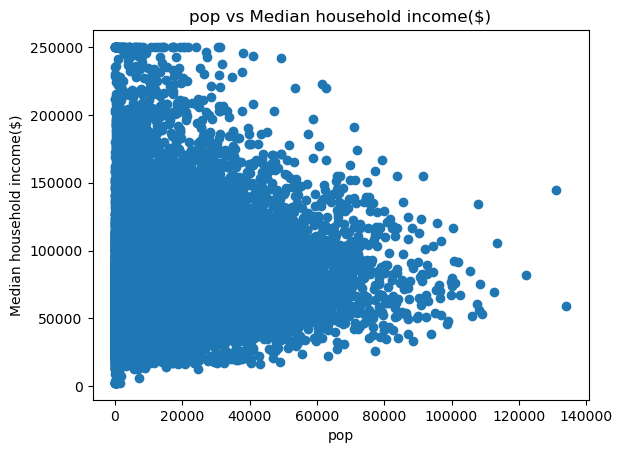

In [13]:
plt.scatter(df['Total population'], df['Median household income($)'])
plt.title('pop vs Median household income($)')
plt.xlabel('pop')
plt.ylabel('Median household income($)')
plt.show()

In [ ]:
sns.pairplot(df)

C:\Users\monar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\monar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\monar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\monar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

KeyboardInterrupt: 

## predicting missing median household income($)

In [12]:
dfcorr = df.loc[:,[ 'Total population', 'White alone','Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races', 'Median age',
       'Median household income($)', 'Male population', 'Female population',
       'Total educational attainment', 'High school graduate',
       'Bachelors degree', 'Masters degree', 'zip code tabulation area']]

In [13]:
dfcorr.dropna(inplace= True)

In [14]:
dfcorr.corr()

Total population  \
Total population                                          1.000000   
White alone                                               0.897389   
Black or African American alone                           0.559202   
American Indian and Alaska Native alone                   0.272181   
Asian alone                                               0.551457   
Native Hawaiian and Other Pacific Islander alone          0.184452   
Some other race alone                                     0.605085   
Two or more races                                         0.799941   
Median age                                               -0.305910   
Median household income($)                                0.180740   
Male population                                           0.998623   
Female population                                         0.998702   
Total educational attainment                              0.993557   
High school graduate                                      0.911911   
Bachelors degree                                          0.927634   
Masters degree                                            0.793805   
zip code tabulation area                                  0.048579   

                                                  White alone  \
Total population                                     0.897389   
White alone                                          1.000000   
Black or African American alone                      0.277083   
American Indian and Alaska Native alone              0.200149   
Asian alone                                          0.372443   
Native Hawaiian and Other Pacific Islander alone     0.103740   
Some other race alone                                0.350329   
Two or more races                                    0.633580   
Median age                                          -0.249019   
Median household income($)                           0.235821   
Male population                                      0.899137   
Female population                                    0.893327   
Total educational attainment                         0.899774   
High school graduate                                 0.800907   
Bachelors degree                                     0.875989   
Masters degree                                       0.779438   
zip code tabulation area                             0.022969   

                                                  Black or African American alone  \
Total population                                                         0.559202   
White alone                                                              0.277083   
Black or African American alone                                          1.000000   
American Indian and Alaska Native alone                                  0.088739   
Asian alone                                                              0.184153   
Native Hawaiian and Other Pacific Islander alone                         0.043706   
Some other race alone                                                    0.304376   
Two or more races                                                        0.347782   
Median age                                                              -0.218305   
Median household income($)                                              -0.063726   
Male population                                                          0.542719   
Female population                                                        0.573733   
Total educational attainment                                             0.547580   
High school graduate                                                     0.583435   
Bachelors degree                                                         0.500606   
Masters degree                                                           0.364050   
zip code tabulation area                                                -0.088425   

                                                  American Indian and Alaska Native alo

In [17]:
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


model = LinearRegression()

X = dfcorr.loc[:,['Total population','White alone','Asian alone','Masters degree']]
y = dfcorr['Median household income($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_pred,y_test))


#resulting rmse is much larger than acceptable value

In [18]:
rmse

27028.20793968637

# Clustering in new combined dataframe 

In [14]:
df_combined = pd.read_csv('census_data_combined.csv')

In [50]:
# using only 2022 data as latest

from copy import deepcopy

df_2022 = deepcopy(df_combined[df_combined['Year']== 2022])



In [51]:
df_2022.head()

Name  Total population  Median age  Median household income($)  \
66894  ZCTA5 00601             16834        44.0                       17526   
66895  ZCTA5 00602             37642        45.2                       20260   
66896  ZCTA5 00603             49075        45.0                       17703   
66897  ZCTA5 00606              5590        46.2                       19603   
66898  ZCTA5 00610             25542        44.4                       22796   

       Under 5 years  5 to 9 years  10 to 14 years  15 to 17 years  \
66894            309           419             523             320   
66895            603           801            1039             647   
66896            827          1135            1394             928   
66897             98            98             131              91   
66898            380           669             605             477   

       18 and 19 years  20 years  ...  60 and 61 years  62 to 64 years  \
66894              233       142  ...              216             265   
66895              448       212  ...              655             821   
66896              712       385  ...              678             813   
66897               59       121  ...               74             120   
66898              305       132  ...              317             548   

       65 and 66 years  67 to 69 years  70 to 74 years  75 to 79 years  \
66894              394             352             231             379   
66895              547             738             987             766   
66896              652             757            1445            1280   
66897               62              90             236              43   
66898              332             481             529             487   

       80 to 84 years  85 years and over  zip code tabulation area  Year  
66894             146                202                       601  2022  
66895             402                331                       602  2022  
66896             545                480                       603  2022  
66897              61                138                       606  2022  
66898             455                169                       610  2022  

[5 rows x 29 columns]

In [52]:
df_2022.describe()

Total population    Median age  Median household income($)  \
count      33774.000000  3.377400e+04                3.377400e+04   
mean        9900.097027 -1.817962e+07               -6.217092e+07   
std        14908.088606  1.085800e+08                1.939778e+08   
min            0.000000 -6.666667e+08               -6.666667e+08   
25%          649.250000  3.670000e+01                4.846650e+04   
50%         2656.000000  4.170000e+01                6.388650e+04   
75%        13329.000000  4.790000e+01                8.277750e+04   
max       134008.000000  9.300000e+01                2.500010e+05   

       Under 5 years  5 to 9 years  10 to 14 years  15 to 17 years  \
count   33774.000000  33774.000000    33774.000000    33774.000000   
mean      289.666963    304.599278      327.692752      196.557115   
std       487.249989    504.890338      544.210467      323.153820   
min         0.000000      0.000000        0.000000        0.000000   
25%        11.000000     12.000000       14.000000        7.000000   
50%        68.000000     75.000000       81.000000       50.000000   
75%       357.000000    377.000000      412.000000      246.000000   
max     11417.000000  10097.000000     8091.000000     4263.000000   

       18 and 19 years      20 years      21 years  ...  60 and 61 years  \
count     33774.000000  33774.000000  33774.000000  ...     33774.000000   
mean        138.035560     70.247557     69.608308  ...       127.952093   
std         268.815261    149.576292    151.766622  ...       189.193879   
min           0.000000      0.000000      0.000000  ...         0.000000   
25%           2.000000      0.000000      0.000000  ...         6.000000   
50%          30.000000     11.000000     11.000000  ...        38.000000   
75%         156.000000     76.000000     74.000000  ...       177.000000   
max        6645.000000   3838.000000   4570.000000  ...      1654.000000   

       62 to 64 years  65 and 66 years  67 to 69 years  70 to 74 years  \
count    33774.000000     33774.000000    33774.000000    33774.000000   
mean       178.353171       108.603985      145.431071      201.234056   
std        255.386896       159.054340      208.662538      291.774537   
min          0.000000         0.000000        0.000000        0.000000   
25%         11.000000         6.000000        9.000000       14.000000   
50%         57.000000        34.000000       48.000000       66.000000   
75%        252.000000       151.000000      204.000000      278.000000   
max       1942.000000      1453.000000     2889.000000     6274.000000   

       75 to 79 years  80 to 84 years  85 years and over  \
count    33774.000000    33774.000000       33774.000000   
mean       129.912240       79.023332          69.921567   
std        198.540364      128.237724         121.218616   
min          0.000000        0.000000           0.000000   
25%          8.000000        3.000000           0.000000   
50%         41.000000       24.000000          17.000000   
75%        174.000000      102.000000          85.000000   
max       5482.000000     3661.000000        2238.000000   

       zip code tabulation area     Year  
count              33774.000000  33774.0  
mean               49697.743856   2022.0  
std                27546.331750      0.0  
min                  601.000000   2022.0  
25%                26733.000000   2022.0  
50%                49720.500000   2022.0  
75%                72159.250000   2022.0  
max                99929.000000   2022.0  

[8 rows x 28 columns]

In [71]:
# find and replace NaN values

df_2022.replace(-666666666.0, pd.NA, inplace = True)

In [70]:
df_2022.dropna(inplace = True)
df_2022

Name  Total population Median age Median household income($)  \
66894   ZCTA5 00601             16834       44.0                      17526   
66895   ZCTA5 00602             37642       45.2                      20260   
66896   ZCTA5 00603             49075       45.0                      17703   
66897   ZCTA5 00606              5590       46.2                      19603   
66898   ZCTA5 00610             25542       44.4                      22796   
...             ...               ...        ...                        ...   
100661  ZCTA5 99921              1727       46.8                      59219   
100662  ZCTA5 99922               328       39.0                      53125   
100664  ZCTA5 99925               920       43.0                      80313   
100665  ZCTA5 99926              1465       37.9                      78365   
100667  ZCTA5 99929              2133       48.9                      61125   

        Under 5 years  5 to 9 years  10 to 14 years  15 to 17 years  \
66894             309           419             523             320   
66895             603           801            1039             647   
66896             827          1135            1394             928   
66897              98            98             131              91   
66898             380           669             605             477   
...               ...           ...             ...             ...   
100661             29            55              36              33   
100662             11             4               7              12   
100664             11            42              56              26   
100665             43            55              64              47   
100667             64            52              72              60   

        18 and 19 years  20 years  ...  60 and 61 years  62 to 64 years  \
66894               233       142  ...              216             265   
66895               448       212  ...              655             821   
66896               712       385  ...              678             813   
66897                59       121  ...               74             120   
66898               305       132  ...              317             548   
...                 ...       ...  ...              ...             ...   
100661               29         7  ...               35              70   
100662                7         2  ...                2              12   
100664               10         3  ...               15              11   
100665                7         0  ...               18              32   
100667               14        11  ...               37              52   

        65 and 66 years  67 to 69 years  70 to 74 years  75 to 79 years  \
66894               394             352             231             379   
66895               547             738             987             766   
66896               652             757            1445            1280   
66897                62              90             236              43   
66898               332             481             529             487   
...                 ...             ...             ...             ...   
100661               35              52              53              42   
100662               12               4              13               2   
100664                9              21              19              16   
100665               22              26              51               4   
100667               22              82              85              27   

        80 to 84 years  85 years and over  zip code tabulation area  Year  
66894              146                202                       601  2022  
66895              402                331                       602  2022  
66896              545                480                       603  2022  
66897               61                138                       606  2022  
66898              455         

In [83]:
df_2022.dtypes

Name                          object
Total population               int64
Median age                     int64
Median household income($)     int64
Under 5 years                  int64
5 to 9 years                   int64
10 to 14 years                 int64
15 to 17 years                 int64
18 and 19 years                int64
20 years                       int64
21 years                       int64
22 to 24 years                 int64
25 to 29 years                 int64
30 to 34 years                 int64
35 to 39 years                 int64
40 to 44 years                 int64
45 to 49 years                 int64
50 to 54 years                 int64
55 to 59 years                 int64
60 and 61 years                int64
62 to 64 years                 int64
65 and 66 years                int64
67 to 69 years                 int64
70 to 74 years                 int64
75 to 79 years                 int64
80 to 84 years                 int64
85 years and over              int64
z

In [82]:
df_2022['Median age'] = df_2022['Median age'].astype({'Median age': 'int64'})
df_2022['Median household income($)'] = df_2022['Median household income($)'].astype({'Median household income($)': 'int64'})

In [86]:
df_2022.iloc[:,1:].corr()

Total population  Median age  \
Total population                    1.000000   -0.305299   
Median age                         -0.305299    1.000000   
Median household income($)          0.180740   -0.003157   
Under 5 years                       0.943088   -0.343574   
5 to 9 years                        0.944619   -0.331271   
10 to 14 years                      0.944010   -0.316252   
15 to 17 years                      0.934844   -0.301359   
18 and 19 years                     0.792599   -0.347995   
20 years                            0.710784   -0.335219   
21 years                            0.706475   -0.329274   
22 to 24 years                      0.870421   -0.359384   
25 to 29 years                      0.918613   -0.348637   
30 to 34 years                      0.933586   -0.333812   
35 to 39 years                      0.957845   -0.320044   
40 to 44 years                      0.961574   -0.300689   
45 to 49 years                      0.961820   -0.278893   
50 to 54 years                      0.962873   -0.258957   
55 to 59 years                      0.957708   -0.239947   
60 and 61 years                     0.918401   -0.218178   
62 to 64 years                      0.929132   -0.209257   
65 and 66 years                     0.895758   -0.181883   
67 to 69 years                      0.897396   -0.166759   
70 to 74 years                      0.879119   -0.133374   
75 to 79 years                      0.824168   -0.094839   
80 to 84 years                      0.779753   -0.079925   
85 years and over                   0.753009   -0.083115   
zip code tabulation area            0.048579   -0.103520   
Year                                     NaN         NaN   

                            Median household income($)  Under 5 years  \
Total population                              0.180740       0.943088   
Median age                                   -0.003157      -0.343574   
Median household income($)                    1.000000       0.144485   
Under 5 years                                 0.144485       1.000000   
5 to 9 years                                  0.170982       0.947958   
10 to 14 years                                0.179866       0.931373   
15 to 17 years                                0.191649       0.907834   
18 and 19 years                               0.086388       0.731108   
20 years                                      0.033837       0.647440   
21 years                                      0.029870       0.644971   
22 to 24 years                                0.087755       0.810153   
25 to 29 years                                0.105634       0.868907   
30 to 34 years                                0.141133       0.892586   
35 to 39 years                                0.189216       0.917657   
40 to 44 years                                0.210382       0.915687   
45 to 49 years                                0.230470       0.902112   
50 to 54 years                                0.234297       0.890108   
55 to 59 years                                0.224879       0.876849   
60 and 61 years                               0.200512       0.835994   
62 to 64 years                                0.192403       0.841067   
65 and 66 years                               0.180278       0.801124   
67 to 69 years                                0.182042       0.798415   
70 to 74 years                                0.186181       0.768974   
75 to 79 years                                0.170848       0.707385   
80 to 84 years                                0.159125       0.664777   
85 years and over                             0.160975       0.640244   
zip code tabulation area                     -0.071519       0.071486   
Year                                               NaN            NaN   

                            5 to 9 years  10 to 14 years  15 to 17 years  \
Total population                0.944619        0.944010        0.934844   
Median age       

In [ ]:
# from sklearn.linear_model import LinearRegression
# import math
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split


# model = LinearRegression()

# X = dfcorr.loc[:,['Total population','White alone','Asian alone','Masters degree']]
# y = dfcorr['Median household income($)']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

# rmse = math.sqrt(mean_squared_error(y_pred,y_test))


# #resulting rmse is much larger than acceptable value

C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\clust

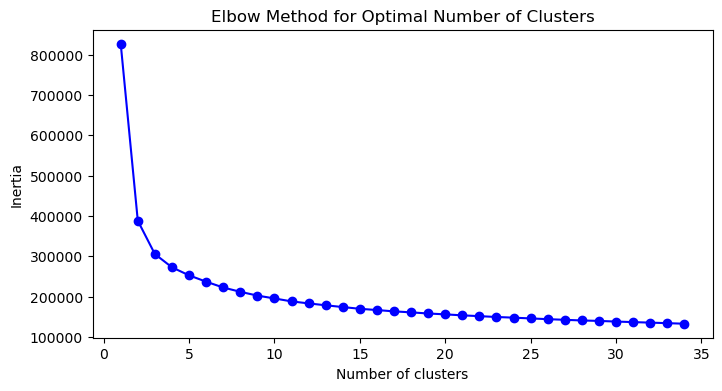

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_kmeans = deepcopy(df_2022.iloc[:,1:])

# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_kmeans)

# Apply KMeans clustering
# Determine the optimal number of clusters using the elbow method

inertia = []
k_range = range(1, 35)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()




In [119]:
print(f"length of inertia = {len(inertia)}")
inertia

length of inertia = 34


[826766.9999999999,
 388043.1259561475,
 305335.0115264749,
 272470.8155315997,
 252607.72750672934,
 236879.8271353826,
 222440.79099303883,
 211778.84592900833,
 202375.17573677484,
 195327.47509769173,
 187993.45752897463,
 183044.58106816543,
 178359.56211137728,
 173973.6277813097,
 169664.5143197156,
 166551.66623940918,
 163284.62317049285,
 160796.35704682866,
 158018.99655841055,
 155848.27808690534,
 153403.0335770084,
 151421.88572784036,
 149353.2615640871,
 147685.94000261443,
 145772.98272373073,
 143964.23220868246,
 142347.31045317944,
 140712.20148628973,
 139625.0223119494,
 137994.2691747361,
 136654.0383265104,
 135367.46060016524,
 134031.17646653514,
 132643.2912282211]

In [120]:
deltas = [inertia[i] - inertia[i + 1] for i in range(len(inertia) - 1)]
print(f"length of deltas: {len(deltas)}")
print(f"delta for k = 15: {deltas[13]}")
deltas

length of deltas: 33
delta for k = 15: 4309.113461594097


[438723.8740438524,
 82708.1144296726,
 32864.19599487522,
 19863.088024870347,
 15727.90037134674,
 14439.036142343772,
 10661.9450640305,
 9403.67019223349,
 7047.700639083108,
 7334.0175687170995,
 4948.876460809202,
 4685.018956788146,
 4385.934330067568,
 4309.113461594097,
 3112.8480803064303,
 3267.043068916333,
 2488.266123664187,
 2777.3604884181113,
 2170.7184715052135,
 2445.244509896933,
 1981.1478491680464,
 2068.6241637532657,
 1667.321561472665,
 1912.9572788836958,
 1808.7505150482757,
 1616.921755503019,
 1635.1089668897039,
 1087.17917434033,
 1630.7531372132944,
 1340.2308482257067,
 1286.57772634516,
 1336.2841336301062,
 1387.8852383140475]

In [114]:
# # Determine the elbow point
# def find_elbow_point(inertia):
#     deltas = [inertia[i] - inertia[i + 1] for i in range(len(inertia) - 1)]
#     ratio_deltas = [deltas[i] / deltas[i + 1] if deltas[i + 1] != 0 else 0 for i in range(len(deltas) - 1)]
#     elbow_point = np.argmax(ratio_deltas) + 2  # Adding 2 because we start from k=1 and ratio_deltas is 1 index behind
#     return elbow_point

# Choose the optimal number of clusters
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# df_2022['Cluster'] = kmeans.fit_predict(df_kmeans)
temp = kmeans.fit_predict(df_normalized)


C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [123]:
for cluster in k_range[:21]:
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    df_2022[f'Cluster_{cluster}'] = kmeans.fit_predict(df_kmeans)



C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\monar\anaconda3\Lib\site-packages\sklearn\clust

In [124]:
# Save the resulting dataframe with cluster labels
df_2022.to_csv('census_data_with_clusters.csv', index=False)
print("Clustered data saved to 'census_data_with_clusters.csv'")

Clustered data saved to 'census_data_with_clusters.csv'


In [125]:
df_2022

Name  Total population  Median age  Median household income($)  \
66894   ZCTA5 00601             16834          44                       17526   
66895   ZCTA5 00602             37642          45                       20260   
66896   ZCTA5 00603             49075          45                       17703   
66897   ZCTA5 00606              5590          46                       19603   
66898   ZCTA5 00610             25542          44                       22796   
...             ...               ...         ...                         ...   
100661  ZCTA5 99921              1727          46                       59219   
100662  ZCTA5 99922               328          39                       53125   
100664  ZCTA5 99925               920          43                       80313   
100665  ZCTA5 99926              1465          37                       78365   
100667  ZCTA5 99929              2133          48                       61125   

        Under 5 years  5 to 9 years  10 to 14 years  15 to 17 years  \
66894             309           419             523             320   
66895             603           801            1039             647   
66896             827          1135            1394             928   
66897              98            98             131              91   
66898             380           669             605             477   
...               ...           ...             ...             ...   
100661             29            55              36              33   
100662             11             4               7              12   
100664             11            42              56              26   
100665             43            55              64              47   
100667             64            52              72              60   

        18 and 19 years  20 years  ...  Cluster_12  Cluster_13  Cluster_14  \
66894               233       142  ...           2          12          12   
66895               448       212  ...           2          12          12   
66896               712       385  ...           2          12           2   
66897                59       121  ...           2          12          12   
66898               305       132  ...           2          12          12   
...                 ...       ...  ...         ...         ...         ...   
100661               29         7  ...           0          11           0   
100662                7         2  ...           5          11           0   
100664               10         3  ...           0          11           0   
100665                7         0  ...           0          11           0   
100667               14        11  ...           0          11           0   

        Cluster_15  Cluster_16  Cluster_17  Cluster_18  Cluster_19  \
66894            8           7          12          12           5   
66895            8           7          12          12           5   
66896           11           6           2           2          10   
66897            8           7          12          12           5   
66898            8           7          12          12           5   
...            ...         ...         ...         ...         ...   
100661          13          14           0           0          17   
100662          13           5           0           0          17   
100664          13          14           0           0           3   
100665          13          14           0           0           3   
100667          13          14           0           0          17   

        Cluster_20  Cluster_21  
66894           14           4  
66895           16           1  
66896           16           1  
66897           14           4  
66898           14           4  
...            ...         ...  
100661           4          16  
100662           4          16  
100664          15          13  
100665          15          13  
100667           4          16  

[30621 rows x 

## rough

In [30]:


API_KEY = '7ecdf2c0aa57cf1965f353edf1399905cc464a2c'
BASE_URL_TEMPLATE = 'https://api.census.gov/data/{year}/acs/acs5'


# Define the variables to fetch
variables = [
    'NAME',
    'B01001_001E',  # Total population
    'B01002_001E',  # Median age
    'B19013_001E',  # Median household income
]


# Convert list to comma-separated string
variables_str = ','.join(variables)

def fetch_census_data(year):
    base_url = BASE_URL_TEMPLATE.format(year=year)
    # Define the parameters for the API request
    params = {
        'get': variables_str,
        'for': 'zip code tabulation area:*',
        'key': API_KEY
    }
    # Make the API request
    response = requests.get(base_url, params=params)

    # Check the response status
    if response.status_code == 200:
        try:
            data = response.json()
            # Convert to DataFrame
            columns = ['Name', 'Total population', 'Median age', 'Median household income($)', 'zip code tabulation area']
            rows = data[1:]
            df = pd.DataFrame(rows, columns=columns)
            return df
        except ValueError as e:
            print(f"Error decoding JSON for year {year}. Response content:")
            print(response.text)
            print(f"JSONDecodeError: {e}")
    else:
        print(f"Failed to fetch data for year {year}: {response.status_code}")
        print("Response content:")
        print(response.text)
    return None

# List of years to fetch data for
years = [2018, 2019, 2020, 2021, 2022]

# Fetch data for each year and concatenate into a single DataFrame
all_data = []
for year in years:
    print(f"Fetching data for year {year}...")
    df = fetch_census_data(year)
    if df is not None:
        df['Year'] = year
        all_data.append(df)

# Combine all data into a single DataFrame
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    # Save the DataFrame to a CSV file
    csv_file_path = 'census_data_combined.csv'
    combined_df.to_csv(csv_file_path, index=False)
    print(f"Data saved to {csv_file_path}")
else:
    print("No data fetched.")



# # Define the parameters for the API request
# params = {
#     'get': variables_str,
#     'for': 'zip code tabulation area:*',
#     'key': API_KEY
# }

# # Make the API request
# response = requests.get(BASE_URL, params=params)

# # Check the response status
# if response.status_code == 200:
#     try:
#         data = response.json()
#         # Convert to DataFrame
#         columns = ['Name','Total population','White alone','Black or African American alone','American Indian and Alaska Native alone','Asian alone','Native Hawaiian and Other Pacific Islander alone','Some other race alone','Two or more races','Median age','Median household income($)','Male population','Female population','Total educational attainment','High school graduate','Bachelors degree','Masters degree','zip code tabulation area']
#         rows = data[1:]
#         df = pd.DataFrame(rows, columns=columns)
#         # Save the DataFrame to a CSV file
#         csv_file_path = 'census_data.csv'
#         df.to_csv(csv_file_path, index=False)
#         print(f"Data saved to {csv_file_path}")
#     except requests.exceptions.JSONDecodeError:
#         print("Error decoding JSON. Response content:")
#         print(response.text)
# else:
#     print(f"Failed to fetch data: {response.status_code}")
#     print("Response content:")
#     print(response.text)

Fetching data for year 2018...
Error decoding JSON for year 2018. Response content:
[["NAME","B01001_001E","B01002_001E","B19013_001E","state","zip code tabulation area"],
["ZCTA5 53563","11206","40.7","74518","55","53563"],
["ZCTA5 53588","4084","49.7","61898","55","53588"],
["ZCTA5 53589","20191","41.4","70585","55","53589"],
["ZCTA5 53713","23029","28.9","42094","55","53713"],
["ZCTA5 53717","12678","37.3","80125","55","53717"],
["ZCTA5 55378","29926","35.4","111355","27","55378"],
["ZCTA5 55395","2898","36.7","60391","27","55395"],
["ZCTA5 55396","2131","44.4","59063","27","55396"],
["ZCTA5 55397","2825","36.9","80375","27","55397"],
["ZCTA5 55398","15891","37.3","87485","27","55398"],
["ZCTA5 55401","9595","34.8","88584","27","55401"],
["ZCTA5 55406","33456","38.1","65631","27","55406"],
["ZCTA5 55411","31850","26.3","39397","27","55411"],
["ZCTA5 55420","21970","37.7","56742","27","55420"],
["ZCTA5 55421","27998","36.8","53248","27","55421"],
["ZCTA5 55313","24379","37.5","78464"

In [31]:
df2 = pd.read_csv('census_data_combined.csv')
df2

Name  Total population   Median age  \
0       ZCTA5 29590              3543         39.1   
1       ZCTA5 93306             74296         31.3   
2       ZCTA5 93660              4082         26.7   
3       ZCTA5 93110             15777         46.9   
4       ZCTA5 93212             22596         34.4   
...             ...               ...          ...   
100663  ZCTA5 99923                25 -666666666.0   
100664  ZCTA5 99925               920         43.0   
100665  ZCTA5 99926              1465         37.9   
100666  ZCTA5 99927                14 -666666666.0   
100667  ZCTA5 99929              2133         48.9   

        Median household income($)  zip code tabulation area  Year  
0                            30985                     29590  2020  
1                            54450                     93306  2020  
2                            39625                     93660  2020  
3                            93264                     93110  2020  
4                            42983                     93212  2020  
...                            ...                       ...   ...  
100663                  -666666666                     99923  2022  
100664                       80313                     99925  2022  
100665                       78365                     99926  2022  
100666                  -666666666                     99927  2022  
100667                       61125                     99929  2022  

[100668 rows x 6 columns]